100%|██████████| 1500/1500 [01:33<00:00, 15.98it/s]


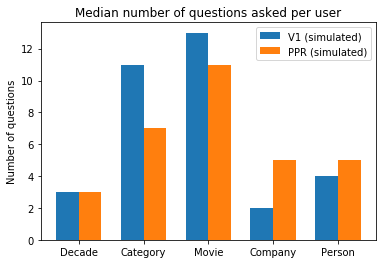

In [2]:
import json
from collections import defaultdict
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

groups = ['Decade', 'Category', 'Movie', 'Company', 'Person']
entities = pd.read_csv(f'../data/entities.csv')
entities.labels = entities.labels.str.split('|')

def get_median_frequencies(df):
    df = df[df.sentiment != 0]
    group_user_frequency = defaultdict(list)
    
    for user in tqdm.tqdm(list(set(df.userId))):
        group_frequency = dict()
        
        for _, rating in df[df.userId == user].iterrows():
            uri_labels = set(reduce(lambda a, b: a + b, entities[entities.uri == rating.uri].labels))
            
            for group in groups:
                if group in uri_labels:
                    group_frequency[group] = group_frequency.get(group, 0) + 1
                    
        for group, frequency in group_frequency.items():
            group_user_frequency.setdefault(group, []).append(frequency)
    
    return [np.median(group_user_frequency[group]) for group in groups]

fig, ax = plt.subplots()
ind = np.arange(len(groups))

width = 0.35
ratings_file = json.load(open('../data/overview.json', 'r'))
for idx, (name, file) in enumerate(ratings_file.items()):
    ax.bar(ind + idx * width, get_median_frequencies(pd.read_csv(file)), width=width, label=name)

ax.set_title('Median number of questions asked per user')
ax.set_ylabel('Number of questions')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(groups)
plt.legend()
plt.savefig('figures/type_frequency.pdf', bbox_inches='tight')
plt.show()
    